In [ ]:
!pip install openpyxl shap # probatus

# Description 
This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

# Read data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import plot_tree


# importing libs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
import tensorflow.keras.metrics as metrics
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# import data
headers_frame = pd.read_csv("./reference.tsv",sep="|")
headers = list(headers_frame["description"])
headers.append("Class")
df = pd.read_excel("./divorce.xlsx",names=headers)

# Data/correlation analysis

In [ ]:
#len(pd.read_excel("./divorce.xlsx").columns)

In [ ]:
df

In [ ]:
len(df.columns)

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [ ]:
print(df.describe())

In [ ]:
df.info()

In [ ]:
df.corr()

## Plot heatmap

In [ ]:
# type = "png"
# plt.figure(figsize = (100,100))
# sns.heatmap(df.corr(), annot=True, center=0, cmap="coolwarm")

# figure = svm.get_figure()    
# figure.savefig("svm_conf4."+type,format=type, dpi=4000)

## Correlation columns

In [ ]:
# Get all colums and names
def get_colums(df):
    for coulmn_name in df:
        yield coulmn_name, df[coulmn_name]

In [ ]:
# Get correlations with input column and all columns
def get_correlations_with_column(input_column):
    for _, column in get_colums(df):
        yield column, column.corr(input_column) ** 2

In [ ]:
# Get it as a dict
def get_correlations_with_column_str(input_column):
    d = {}
    for column, column_corr in get_correlations_with_column(input_column):
        if not column is input_column:
            d[column.name] = column_corr
    return d

## Correlation columns

In [ ]:
corrs = get_correlations_with_column_str(df["Class"])
corrs_sorted = sorted(corrs.items(), key=lambda x: x[1], reverse=True)
corrs_sorted

In [ ]:
for num, corrs in enumerate(corrs_sorted, start=1):
    feature, corr = corrs
    print(f"{num}) {feature} = {corr}")

## Select (top-n) features

In [ ]:
top_selected_features = [x[0] for x in corrs_sorted][:5]

In [ ]:
top_selected_features

In [ ]:
customly_selected_features = [
    # "My spouse and I have similar ideas about how roles should be in marriage",
    # "I enjoy traveling with my wife.",
    # "The time I spent with my wife is special for us.",
    "I know my spouse's basic anxieties.",
    "My discussion with my spouse is not calm.",
    "I know my spouse's favorite food.",
    "I know my spouse's friends and their social relationships.",
    "I know what my spouse's current sources of stress are.",
]
print(len(customly_selected_features))
top_selected_features=customly_selected_features

In [ ]:
y = df["Class"]
X = df[top_selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

In [ ]:
y_train

## Scale features

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# #StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, 
# #so that each column/feature/variable will have μ = 0 and σ = 1.
# standard = StandardScaler() 
# X_train_scaled = standard.fit_transform(X_train)
# X_test_scaled = standard.fit_transform(X_test)

# #X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# #X_scaled = X_std * (max - min) + min
# normalization = MinMaxScaler()
# X_train_normalized = normalization.fit_transform(X_train)
# X_test_normalized = normalization.fit_transform(X_test)

# #Scale features using statistics that are robust to outliers.
# robust = RobustScaler()
# X_train_robust = robust.fit_transform(X_train)
# X_test_robust = robust.fit_transform(X_test)

## Model creation

In [ ]:
from time import time
from sklearn import metrics
def benchmark(clf):
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("prediction time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    print("classification report:")
    print(classification_report(y_test, pred))

    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(pred, axis=1)

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test_class, y_pred_class))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [ ]:
input_shape = (len(X_train.columns),)
metrics = ["accuracy"]

model = Sequential()
model.add(Dense(8, input_shape=input_shape, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(  optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy", metrics=metrics)

model.summary()

## Model training

# NN

In [ ]:
import time

num_of_epochs = 200

start_time = time.time()
print(f"--- Started trainging: {start_time}")


history = model.fit( X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200, verbose=3, batch_size=128)

loss, accuracy = model.evaluate(
    X_test, y_test, verbose=0)


end_time = time.time()
training_time = end_time - start_time

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

print(f"--- Ended training: {end_time}")
print(f"--- Training time: {training_time}")
print(f"--- Model accuracy: {accuracy}")
print(f"--- Model loss: {loss}")

# D-tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from random import randint

# seed = randint(0,1000)
seed = 334
print(f"{seed=}")

dtree = DecisionTreeClassifier(random_state=seed, max_depth=5)
tree_hist = dtree.fit(X_train, y_train)

In [ ]:
pred = dtree.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print(f"{score=}")

## Plotting results

In [ ]:
# plt.plot(num_of_epochs, training_loss, "r--")
# plt.plot(num_of_epochs, test_loss, "b-")
# plt.legend(["Training Loss", "Test Loss"])
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.show()

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [ ]:
import sklearn, graphviz

dot_data = sklearn.tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Shap

In [ ]:
import shap
shap.initjs()

In [ ]:
X_importance = X_test

### NN

In [ ]:
# explainer = shap.DeepExplainer(model, X_train)
nn_explainer = shap.KernelExplainer(model.predict, X_train)
# nn_shap_interpreter = ShapModelInterpreter(predict)

nn_shap_values = nn_explainer.shap_values(X_test, nsamples=1000)

In [ ]:
shap.summary_plot(nn_shap_values, X_test, feature_names=top_selected_features)

In [ ]:
# from probatus.interpret import ShapModelInterpreter
# shap_interpreter = ShapModelInterpreter(model)

### Dtree

In [ ]:
dtree_explainer = shap.TreeExplainer(dtree)
dtree_shap_values = dtree_explainer.shap_values(X_test)

In [ ]:
dtree_shap_values = dtree_explainer.shap_values(X_train)
shap.summary_plot(dtree_shap_values,X_train)

In [ ]:
# shap_interpreter = ShapModelInterpreter(clf)
# feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False)
# feature_importance

In [ ]:
from shap import Explainer, Explanation

### Dtree

In [299]:
dtree_explainer = shap.TreeExplainer(dtree)
dtree_shap_values = dtree_explainer.shap_values(X_test)

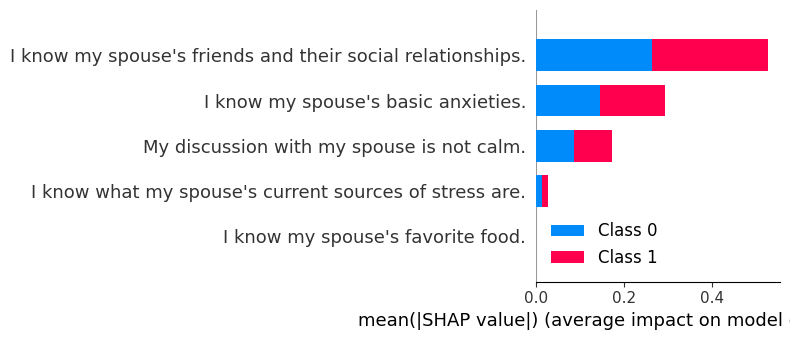

In [300]:
dtree_shap_values = dtree_explainer.shap_values(X_train)
shap.summary_plot(dtree_shap_values,X_train)

In [301]:
# shap_interpreter = ShapModelInterpreter(clf)
# feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False)
# feature_importance

In [302]:
from shap import Explainer, Explanation